## Other High Street Dimensions

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [3]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

***

### BRINGING IN OTHER DATASETS

In [4]:
GLA = gpd.read_file("https://data.london.gov.uk/download/gla-high-street-boundaries/166e8e42-c1ea-42ec-bd1d-99dc29d04fa8/GLA_High_Street_boundaries.gpkg")

<AxesSubplot:>

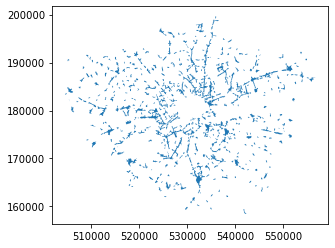

In [5]:
GLA.plot()

In [6]:
boros = gpd.read_file('data/geo/Boroughs.gpkg')

In [7]:
Camden = boros[boros["NAME"]=="Camden"]

In [8]:
CamHS = gpd.clip(GLA, Camden)

### 1. Public Conveniences - Toilets 
- https://opendata.camden.gov.uk/People-Places/Public-Conveniences-In-Camden-Map/ugmt-ivnb

In [9]:
PC = pd.read_csv('High Street Dimensions/Public_Conveniences_In_Camden_Map.csv')

In [10]:
PC = gpd.GeoDataFrame(PC, geometry = gpd.points_from_xy(PC['Easting'], PC['Northing'], crs="epsg:27700"))

In [11]:
PC1 = gpd.clip(PC, CamHS)

<AxesSubplot:>

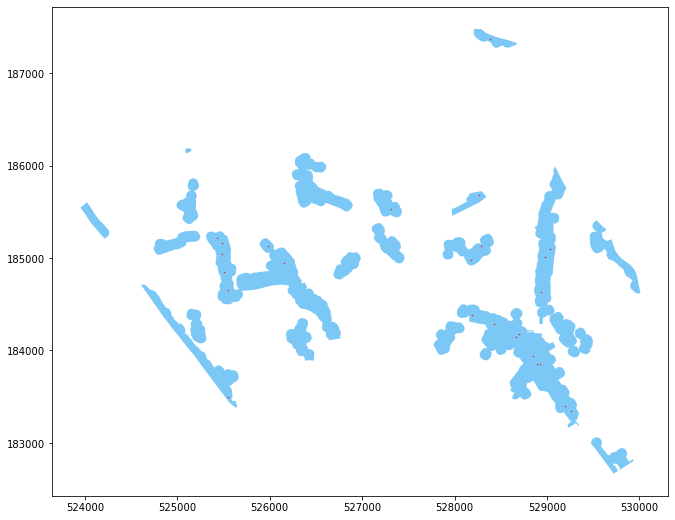

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor="none", facecolor='xkcd:lightblue', ax=ax)
PC1.plot(color= "red", markersize=0.2, ax=ax)

In [13]:
#for each index I want to count the number of points within 

In [14]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(PC, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['public toilets']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [15]:
pointsInPolygon

,E-Mail,Easting,Northing,Longitude,Latitude,Socrata ID,index_right,objectid,highstreet_id,area_ha,public toilets
highstreet_name,,,,,,,,,,,
Camden Town HS,0.0,4.759106e+06,1.655388e+06,-1.298961,463.856424,114,2637,2583,2583,507.143318,9
"Fortress Road, Tufnell Park.",0.0,1.586941e+06,5.547390e+05,-0.423655,154.645128,63,873,855,855,84.977156,3
"Highgate High Street, Highgate.",0.0,5.283890e+05,1.873680e+05,-0.148856,51.570576,39,326,319,319,8.723256,1
"Kilburn High Road, Kilburn.",0.0,5.255520e+05,1.834940e+05,-0.191137,51.536389,32,342,335,335,39.984193,1
"Mansfield Road, Gospel Oak",0.0,5.282660e+05,1.856820e+05,-0.151237,51.555450,23,476,468,468,3.508042,1
"Queen’s Crescent, Gospel Oak.",0.0,1.056458e+06,3.701140e+05,-0.304011,103.099689,83,670,656,656,20.629557,2
"South End Road, Hampstead.",0.0,5.273110e+05,1.855360e+05,-0.165065,51.554347,45,314,307,307,6.131431,1
"West End Lane, West Hampstead.",0.0,3.679587e+06,1.294997e+06,-1.323828,360.849307,255,3696,3885,3885,327.242856,7


In [16]:
toilets = pointsInPolygon[['public toilets']]

In [17]:
toilets

,public toilets
highstreet_name,
Camden Town HS,9
"Fortress Road, Tufnell Park.",3
"Highgate High Street, Highgate.",1
"Kilburn High Road, Kilburn.",1
"Mansfield Road, Gospel Oak",1
"Queen’s Crescent, Gospel Oak.",2
"South End Road, Hampstead.",1
"West End Lane, West Hampstead.",7


In [18]:
CamHS = pd.merge(CamHS, toilets, how = "outer", on= "highstreet_name")

In [19]:
CamHS

,objectid,highstreet_id,highstreet_name,area_ha,gdb_geomattr_data,geometry,public toilets
0,97,97,Brecknock Road & York Way.,15.327961,None,"POLYGON ((529626.963 185290.470, 529619.385 18...",NaN
1,98,98,Kentish Town Road.,11.453950,None,"POLYGON ((529169.048 184315.559, 529169.180 18...",NaN
2,285,285,"Fortress Road, Tufnell Park.",28.325719,None,"POLYGON ((529209.157 185757.682, 529206.506 18...",3.0
3,287,287,Camden Town HS,56.349258,None,"POLYGON ((528129.528 184489.100, 528138.350 18...",9.0
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,"POLYGON ((526892.645 185059.806, 526900.890 18...",NaN
5,304,304,"Loudoun Road, South Hampstead.",8.078871,None,"POLYGON ((526350.252 184351.109, 526360.006 18...",NaN
6,306,306,"Haverstock Hill, Belsize Park.",7.074332,None,"POLYGON ((527238.261 185262.468, 527237.189 18...",NaN
7,307,307,"South End Road, Hampstead.",6.131431,None,"POLYGON ((527231.814 185728.745, 527232.663 18...",1.0
8,319,319,"Highgate High Street, Highgate.",8.723256,None,"POLYGON ((528678.473 187328.037, 528676.686 18...",1.0
9,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,"POLYGON ((524019.997 185605.672, 524022.679 18...",NaN


### 2. Tree Coverage 
    - https://opendata.camden.gov.uk/Environment/Trees-In-Camden/csqp-kdss

In [20]:
Trees = pd.read_csv('High Street Dimensions/Trees_In_Camden.csv')

In [21]:
Trees = gpd.GeoDataFrame(Trees, geometry = gpd.points_from_xy(Trees['Easting'], Trees['Northing'], crs="epsg:27700"))

In [22]:
Trees1 = gpd.clip(Trees, CamHS)

<AxesSubplot:>

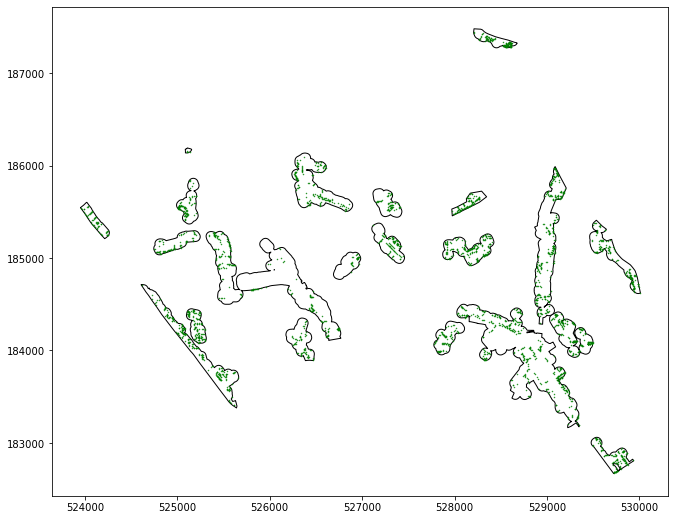

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor="black", facecolor='white', ax=ax)
Trees1.plot(color= "green", markersize=0.2, ax=ax)

In [24]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(Trees, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['trees']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [25]:
trees = pointsInPolygon[['trees']]

In [26]:
trees

,trees
highstreet_name,
"Belsize Lane, Belsize Park.",33
Brecknock Road & York Way.,162
Camden Town HS,405
"Cricklewood Broadway, Cricklewood.",62
"Eversholt Street, Somers Town",133
"Finchley Road, Childs Hill",4
"Fortress Road, Tufnell Park.",290
"Fortune Green Road, Fortune Green.",99
"Hampstead High Street, Hampstead.",164


In [27]:
CamHS = pd.merge(CamHS, trees, how = "outer", on= "highstreet_name")

In [28]:
CamHS

,objectid,highstreet_id,highstreet_name,area_ha,gdb_geomattr_data,geometry,public toilets,trees
0,97,97,Brecknock Road & York Way.,15.327961,None,"POLYGON ((529626.963 185290.470, 529619.385 18...",NaN,162
1,98,98,Kentish Town Road.,11.453950,None,"POLYGON ((529169.048 184315.559, 529169.180 18...",NaN,203
2,285,285,"Fortress Road, Tufnell Park.",28.325719,None,"POLYGON ((529209.157 185757.682, 529206.506 18...",3.0,290
3,287,287,Camden Town HS,56.349258,None,"POLYGON ((528129.528 184489.100, 528138.350 18...",9.0,405
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,"POLYGON ((526892.645 185059.806, 526900.890 18...",NaN,33
5,304,304,"Loudoun Road, South Hampstead.",8.078871,None,"POLYGON ((526350.252 184351.109, 526360.006 18...",NaN,64
6,306,306,"Haverstock Hill, Belsize Park.",7.074332,None,"POLYGON ((527238.261 185262.468, 527237.189 18...",NaN,96
7,307,307,"South End Road, Hampstead.",6.131431,None,"POLYGON ((527231.814 185728.745, 527232.663 18...",1.0,62
8,319,319,"Highgate High Street, Highgate.",8.723256,None,"POLYGON ((528678.473 187328.037, 528676.686 18...",1.0,118
9,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,"POLYGON ((524019.997 185605.672, 524022.679 18...",NaN,62


### Transport

In [29]:
transport = gpd.read_file('greater-london-latest-free.shp/gis_osm_transport_a_free_1.shp')

In [30]:
transport1 = gpd.read_file('greater-london-latest-free.shp/gis_osm_transport_free_1.shp')

In [31]:
transport = transport.to_crs('EPSG:27700')
transport1 = transport1.to_crs('EPSG:27700')

In [32]:
transport = gpd.clip(transport, Camden)

In [33]:
transport

,osm_id,code,fclass,name,geometry
2,15705264,5622,bus_station,None,"POLYGON ((529586.062 182585.229, 529589.689 18..."
62,157757521,5641,taxi,Mini Cabs,"POLYGON ((530137.868 181436.441, 530139.883 18..."
135,424852308,5641,taxi,None,"POLYGON ((529808.806 181434.366, 529811.393 18..."
140,453127296,5641,taxi,Mornington Cars,"POLYGON ((529184.899 183361.876, 529184.854 18..."
162,671964294,5641,taxi,Euston Station,"POLYGON ((529572.686 182529.751, 529614.172 18..."
185,913673439,5622,bus_station,24 Bus - End of Route,"POLYGON ((527295.854 185550.057, 527297.455 18..."


In [34]:
transport1 = gpd.clip(transport1, Camden)

In [35]:
transport1['fclass'] = transport1['fclass'].astype('category')

In [36]:
list(transport1['fclass'].unique())

['railway_station', 'bus_stop', 'taxi', 'helipad', 'ferry_terminal']

In [38]:
bus = transport1[(transport1['fclass'] == 'bus_stop')]

In [39]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(bus, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['bus_stops']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [40]:
busstops = pointsInPolygon[['bus_stops']]

In [41]:
CamHS = pd.merge(CamHS, busstops, how = "outer", on= "highstreet_name")

In [42]:
train =  transport1[(transport1['fclass'] == 'railway_station')]

In [43]:
# Spatial Joins
pointsInPolygon = gpd.sjoin(train, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['train']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [44]:
trains = pointsInPolygon[['train']]

In [45]:
CamHS = pd.merge(CamHS, trains, how = "outer", on= "highstreet_name")

In [46]:
CamHS

,objectid,highstreet_id,highstreet_name,area_ha,gdb_geomattr_data,geometry,public toilets,trees,bus_stops,train
0,97,97,Brecknock Road & York Way.,15.327961,None,"POLYGON ((529626.963 185290.470, 529619.385 18...",NaN,162,1.0,NaN
1,98,98,Kentish Town Road.,11.453950,None,"POLYGON ((529169.048 184315.559, 529169.180 18...",NaN,203,5.0,1.0
2,285,285,"Fortress Road, Tufnell Park.",28.325719,None,"POLYGON ((529209.157 185757.682, 529206.506 18...",3.0,290,17.0,1.0
3,287,287,Camden Town HS,56.349258,None,"POLYGON ((528129.528 184489.100, 528138.350 18...",9.0,405,30.0,3.0
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,"POLYGON ((526892.645 185059.806, 526900.890 18...",NaN,33,NaN,NaN
5,304,304,"Loudoun Road, South Hampstead.",8.078871,None,"POLYGON ((526350.252 184351.109, 526360.006 18...",NaN,64,1.0,1.0
6,306,306,"Haverstock Hill, Belsize Park.",7.074332,None,"POLYGON ((527238.261 185262.468, 527237.189 18...",NaN,96,4.0,1.0
7,307,307,"South End Road, Hampstead.",6.131431,None,"POLYGON ((527231.814 185728.745, 527232.663 18...",1.0,62,5.0,1.0
8,319,319,"Highgate High Street, Highgate.",8.723256,None,"POLYGON ((528678.473 187328.037, 528676.686 18...",1.0,118,4.0,NaN
9,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,"POLYGON ((524019.997 185605.672, 524022.679 18...",NaN,62,1.0,NaN


<AxesSubplot:>

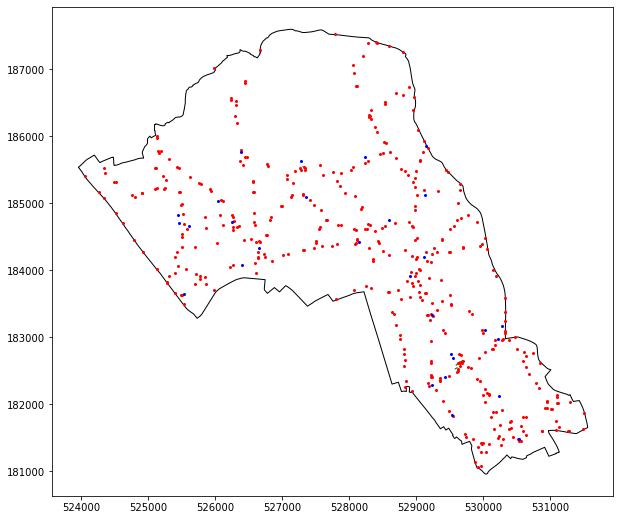

In [47]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Camden.plot(edgecolor="black", facecolor='white', ax=ax)
transport.plot(color= "green", markersize=4, ax=ax)
bus.plot(color= "red", markersize=4, ax=ax)
train.plot(color= "blue", markersize=4, ax=ax)

OSM POINT OF INTEREST

In [50]:
pois  = gpd.read_file('OSM Camden/Camden pois points.shp')

In [53]:
pois = pois.to_crs('EPSG:27700')

<AxesSubplot:>

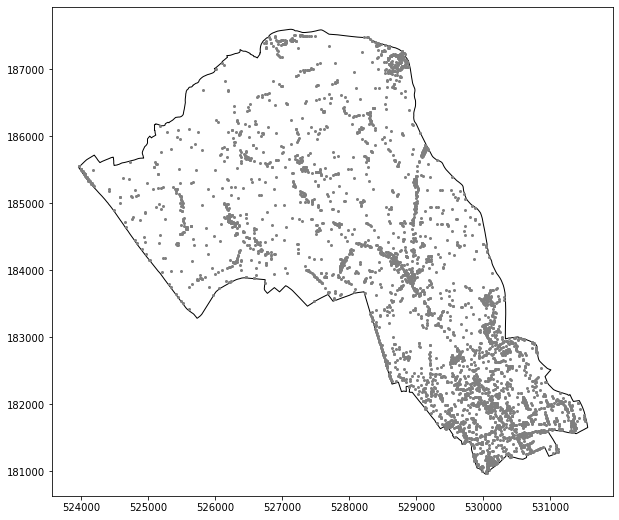

In [54]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

Camden.plot(edgecolor="black", facecolor='white', ax=ax)
pois.plot(color= "grey", markersize=4, ax=ax)

In [55]:
pois1 = gpd.clip(pois, CamHS)

<AxesSubplot:>

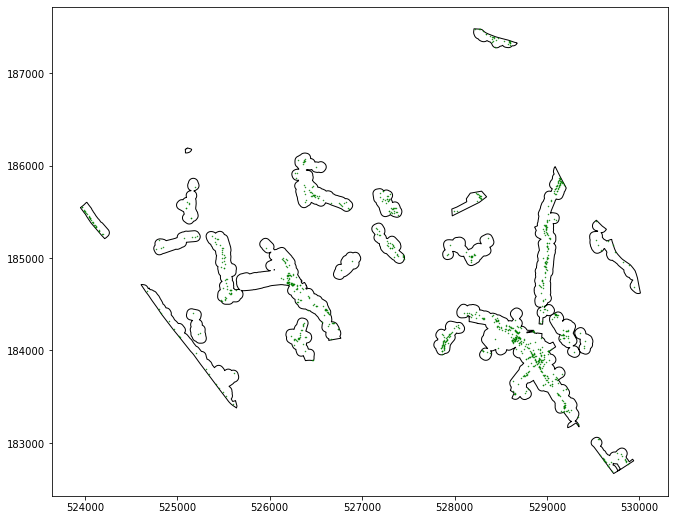

In [56]:
fig, ax = plt.subplots(1,1, figsize=(12,9))

CamHS.plot(edgecolor="black", facecolor='white', ax=ax)
pois1.plot(color= "green", markersize=0.2, ax=ax)

In [67]:
pois

,osm_id,code,fclass,name,geometry
0,108042,2304,pub,Simmons,POINT (529447.685 182163.626)
1,13799212,2007,library,Holborn Library,POINT (530835.223 181922.569)
2,21593232,2304,pub,The Knights Templar,POINT (531120.281 181290.740)
3,21593236,2304,pub,Ship Tavern,POINT (530597.209 181489.064)
4,21593237,2305,bar,The Polish Bar (Na Zdrowie),POINT (530614.006 181501.914)
...,...,...,...,...,...
4327,8718779378,2902,bench,None,POINT (526428.263 184414.083)
4328,8718779379,2902,bench,None,POINT (526476.291 184383.644)
4329,8718779380,2902,bench,None,POINT (526517.047 184338.247)
4330,8728793319,2006,telephone,None,POINT (529810.723 182854.880)


In [59]:
pois['fclass'] = pois['fclass'].astype('category')

In [77]:
poi_dummies = pd.get_dummies(pois['fclass'])

In [78]:
poi_dummies

,arts_centre,artwork,atm,attraction,bakery,bank,bar,beauty_shop,bench,beverages,...,university,vending_any,vending_machine,vending_parking,veterinary,video_shop,viewpoint,waste_basket,water_well,wayside_shrine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4328,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4329,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
test = pd.concat([pois, poi_dummies], axis=1)

In [93]:
test

,osm_id,code,fclass,name,geometry,arts_centre,artwork,atm,attraction,bakery,...,university,vending_any,vending_machine,vending_parking,veterinary,video_shop,viewpoint,waste_basket,water_well,wayside_shrine
0,108042,2304,pub,Simmons,POINT (529447.685 182163.626),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13799212,2007,library,Holborn Library,POINT (530835.223 181922.569),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21593232,2304,pub,The Knights Templar,POINT (531120.281 181290.740),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21593236,2304,pub,Ship Tavern,POINT (530597.209 181489.064),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21593237,2305,bar,The Polish Bar (Na Zdrowie),POINT (530614.006 181501.914),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,8718779378,2902,bench,None,POINT (526428.263 184414.083),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4328,8718779379,2902,bench,None,POINT (526476.291 184383.644),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4329,8718779380,2902,bench,None,POINT (526517.047 184338.247),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4330,8728793319,2006,telephone,None,POINT (529810.723 182854.880),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
test.drop(['fclass'], inplace=True, axis=1)

In [65]:
POIs = list(pois.fclass.unique())

In [96]:
polygons = CamHS.copy()

# Spatial Joins
pointsInPolygon = gpd.sjoin(test, polygons, how="inner", op='intersects')

# Add a field with 1 as a constant value
pointsInPolygon['pois']=1

# Group according to the column by which you want to aggregate data
pointsInPolygon = pointsInPolygon.groupby(['highstreet_name']).sum()

In [97]:
pointsInPolygon

,code,arts_centre,artwork,atm,attraction,bakery,bank,bar,beauty_shop,bench,...,wayside_shrine,index_right,objectid,highstreet_id,area_ha,public toilets,trees,bus_stops,train,pois
highstreet_name,,,,,,,,,,,,,,,,,,,,,
"Belsize Lane, Belsize Park.",4088,0,0,0,0,0,0,0,0,0,...,0,8,606,606,10.139230,0.0,66,0.0,0.0,2
Brecknock Road & York Way.,22688,0,0,0,0,0,0,0,0,0,...,0,0,970,970,153.279607,0.0,1620,10.0,0.0,10
Camden Town HS,834013,0,5,12,2,6,2,13,3,19,...,0,1023,97867,97867,19215.096844,3069.0,138105,10230.0,1023.0,341
"Cricklewood Broadway, Cricklewood.",72239,0,0,0,0,1,0,0,1,0,...,0,270,9660,9660,850.165780,0.0,1860,30.0,0.0,30
"Eversholt Street, Somers Town",56034,0,1,0,0,0,0,0,0,1,...,0,480,14256,14256,151.288750,0.0,3192,0.0,0.0,24
"Fortress Road, Tufnell Park.",306491,0,0,9,0,0,0,2,4,1,...,0,250,35625,35625,3540.714846,375.0,36250,2125.0,125.0,125
"Fortune Green Road, Fortune Green.",17944,0,0,0,0,0,0,0,0,0,...,0,112,2976,2976,52.651898,0.0,792,40.0,0.0,8
"Hampstead High Street, Hampstead.",113200,0,3,1,0,0,0,0,0,5,...,0,893,26038,26038,846.739045,0.0,7708,329.0,47.0,47
"Haverstock Hill, Belsize Park.",65284,0,0,0,0,0,0,0,0,2,...,0,168,8568,8568,198.081309,0.0,2688,112.0,28.0,28


In [103]:
POIss = pointsInPolygon[POIs]

In [104]:
POIss

,pub,library,bar,cafe,toilet,waste_basket,artwork,post_box,supermarket,monument,...,comms_tower,guesthouse,car_wash,computer_shop,video_shop,vending_machine,picnic_site,swimming_pool,park,observation_tower
highstreet_name,,,,,,,,,,,,,,,,,,,,,
"Belsize Lane, Belsize Park.",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Brecknock Road & York Way.,1,0,0,0,0,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
Camden Town HS,7,1,13,16,7,16,5,7,2,2,...,1,0,0,0,1,0,0,0,0,0
"Cricklewood Broadway, Cricklewood.",2,0,0,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"Eversholt Street, Somers Town",3,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Fortress Road, Tufnell Park.",3,0,2,9,0,20,0,7,2,0,...,0,0,1,0,0,0,0,0,0,0
"Fortune Green Road, Fortune Green.",0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"Hampstead High Street, Hampstead.",1,0,0,2,0,0,3,6,0,0,...,0,0,0,0,0,0,0,0,0,0
"Haverstock Hill, Belsize Park.",1,0,0,4,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
CamHS = pd.merge(CamHS, POIss, how = "outer", on= "highstreet_name")

In [106]:
CamHS

,objectid,highstreet_id,highstreet_name,area_ha,gdb_geomattr_data,geometry,public toilets,trees,bus_stops,train,...,comms_tower,guesthouse,car_wash,computer_shop,video_shop,vending_machine,picnic_site,swimming_pool,park,observation_tower
0,97,97,Brecknock Road & York Way.,15.327961,None,"POLYGON ((529626.963 185290.470, 529619.385 18...",NaN,162,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98,98,Kentish Town Road.,11.453950,None,"POLYGON ((529169.048 184315.559, 529169.180 18...",NaN,203,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,285,285,"Fortress Road, Tufnell Park.",28.325719,None,"POLYGON ((529209.157 185757.682, 529206.506 18...",3.0,290,17.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,287,287,Camden Town HS,56.349258,None,"POLYGON ((528129.528 184489.100, 528138.350 18...",9.0,405,30.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,303,303,"Belsize Lane, Belsize Park.",5.069615,None,"POLYGON ((526892.645 185059.806, 526900.890 18...",NaN,33,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,304,304,"Loudoun Road, South Hampstead.",8.078871,None,"POLYGON ((526350.252 184351.109, 526360.006 18...",NaN,64,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,306,306,"Haverstock Hill, Belsize Park.",7.074332,None,"POLYGON ((527238.261 185262.468, 527237.189 18...",NaN,96,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,307,307,"South End Road, Hampstead.",6.131431,None,"POLYGON ((527231.814 185728.745, 527232.663 18...",1.0,62,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,319,319,"Highgate High Street, Highgate.",8.723256,None,"POLYGON ((528678.473 187328.037, 528676.686 18...",1.0,118,4.0,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,322,322,"Cricklewood Broadway, Cricklewood.",28.338859,None,"POLYGON ((524019.997 185605.672, 524022.679 18...",NaN,62,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
CamHS.to_csv('')